In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory('data/train', target_size =(150, 150), 
                                                      batch_size = 20, class_mode = "binary")
  
validation_generator = test_datagen.flow_from_directory('data/test', target_size =(150, 150),
                                                      batch_size = 20, class_mode = "binary")

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [33]:
from keras import models
from keras import layers
  
model = models.Sequential()
  
model.add(layers.Conv2D(32, (3, 3), activation ='softmax', input_shape =(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(64, (3, 3), activation ='softmax'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(128, (3, 3), activation ='softmax'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Conv2D(128, (3, 3), activation ='softmax'))
model.add(layers.MaxPooling2D((2, 2)))
  
model.add(layers.Flatten())
  
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))
  
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [34]:
from keras import optimizers
  
model.compile(loss ="binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4),
metrics =['accuracy'])
  
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10,
validation_data = validation_generator, validation_steps = 50)

Epoch 1/10


C:\Users\DAWN\AppData\Local\Temp/ipykernel_10196/1677811787.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10,


100/100 [==============================] - 40s 397ms/step - loss: 0.6905 - accuracy: 0.5413 - val_loss: 0.6890 - val_accuracy: 0.5455
Epoch 2/10
100/100 [==============================] - 40s 399ms/step - loss: 0.6889 - accuracy: 0.5493
Epoch 3/10
100/100 [==============================] - 40s 398ms/step - loss: 0.6884 - accuracy: 0.5513
Epoch 4/10
100/100 [==============================] - 40s 403ms/step - loss: 0.6889 - accuracy: 0.5468
Epoch 5/10
100/100 [==============================] - 41s 409ms/step - loss: 0.6913 - accuracy: 0.5368
Epoch 6/10
100/100 [==============================] - 40s 400ms/step - loss: 0.6909 - accuracy: 0.5373
Epoch 7/10
100/100 [==============================] - 40s 399ms/step - loss: 0.6887 - accuracy: 0.5488
Epoch 8/10
100/100 [==============================] - 40s 403ms/step - loss: 0.6886 - accuracy: 0.5513
Epoch 9/10
100/100 [==============================] - 40s 398ms/step - loss: 0.6902 - accuracy: 0.5438
Epoch 10/10
100/100 [=====================

(1, 150, 150, 3)


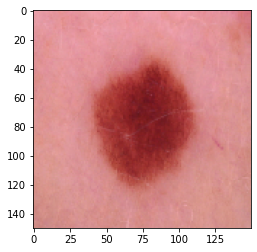

In [35]:
from keras.utils import load_img, img_to_array
import numpy as np
  
# Pre-processing the image
img = load_img('data/train/benign/17.jpg', target_size = (150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

1/1 [==============================] - 0s 68ms/step
(1, 148, 148, 32)


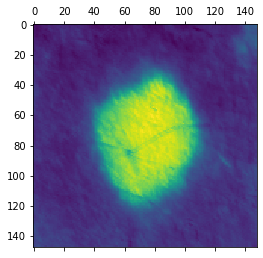

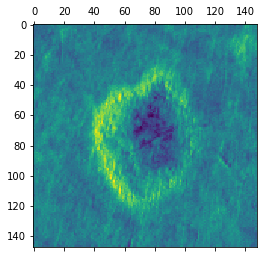

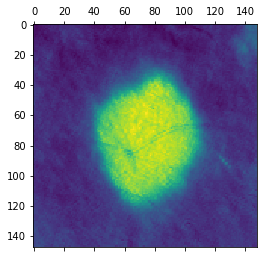

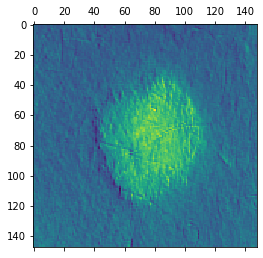

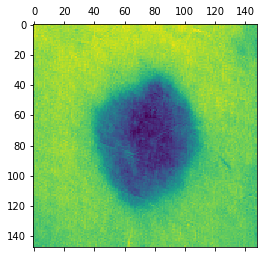

In [36]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)

# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')

plt.matshow(first_layer_activation[0, :, :, 8], cmap ='viridis')

plt.matshow(first_layer_activation[0, :, :, 10], cmap ='viridis')

plt.matshow(first_layer_activation[0, :, :, 12], cmap ='viridis')
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

In [24]:
layer_names = []
  
for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

['conv2d_4', 'max_pooling2d_4', 'conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7']
